<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Machine-Learning/blob/main/ML/classes/class_march_3/class_march_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Clase de Marzo 29 sobre Muestreo estratificado

Scikit-Learn proporciona algunas funciones para dividir conjuntos de datos en múltiples subconjuntos de varias maneras. 

La función más simple es `train_test_split()`, que hace más o menos lo mismo que la función `split_train_test()`, con un par de características adicionales.

Primero, hay un parámetro `random_state` que le permite establecer la semilla del generador aleatorio.

En segundo lugar, puede pasarle varios conjuntos de datos con un número idéntico de filas y los dividirá en los mismos índices (esto es muy útil, por ejemplo, si tiene un marco de datos separado para las etiquetas):

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

v = pd.read_csv('vivienda.csv') 

In [2]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(v, test_size=0.2, random_state=42)


Hasta ahora hemos considerado métodos de muestreo puramente aleatorios.

Esto generalmente está bien si su conjunto de datos es lo suficientemente grande (especialmente en relación con la cantidad de atributos), pero si no lo es, corre el riesgo de introducir un **sesgo de muestreo significativo**. 

Cuando una empresa de encuestas decide llamar a 1000 personas para hacerles algunas preguntas, no elige a 1000 personas al azar en una guía telefónica. 

Intentan asegurarse de que estas 1.000 personas sean representativas de toda la población. 

Por ejemplo, la población de EE. UU. es 51,3 % de mujeres y 48,7 % de hombres, por lo que una encuesta bien realizada en EE. UU. intentaría mantener esta proporción en la muestra: 513 mujeres y 487 hombres.

Esto se denomina muestreo estratificado:  

* la población se divide en subgrupos homogéneos llamados **estratos**, 
* y se **muestrea** el número correcto de instancias de cada estrato para garantizar que el conjunto de prueba sea representativo de la población general.

Si las personas que realizan la encuesta usaran un muestreo puramente aleatorio, habría alrededor de un 12 % de posibilidades de muestrear un conjunto de prueba sesgado que tuviera menos del 49 % de mujeres o más del 54 % de mujeres.

De cualquier manera, los resultados de la encuesta estarían significativamente sesgados.

Suponga que conversó con expertos que le dijeron que el ingreso medio es un atributo muy importante para predecir los precios medios de la vivienda.

Es posible que desee asegurarse de que el conjunto de prueba sea representativo de las diversas categorías de ingresos en todo el conjunto de datos.

Dado que el ingreso medio es un atributo numérico continuo, primero debe crear un atributo categórico de ingresos.

Miremos más de cerca el histograma de ingresos medios (de vuelta en la Figura 2-8): la mayoría de los valores de ingresos medios se agrupan alrededor de 1,5 a 6 (es decir, $15 000–$60 000), pero algunos ingresos medios van mucho más allá de 6.

Es importante tener una cantidad suficiente de instancias en su conjunto de datos para cada estrato, de lo contrario, la estimación de la importancia de un estrato puede estar sesgada.

Esto significa que no debe tener demasiados estratos, y cada estrato debe ser lo suficientemente grande.

El siguiente código usa la función `pd.cut()` para crear un atributo de categoría de ingresos con cinco categorías (etiquetadas del 1 al 5): la categoría 1 va de 0 a 1,5 (es decir, menos de $15 000), la categoría 2 de 1,5 a 3, y así sucesivamente:

In [15]:
v["ingresos_cat"] = pd.cut(v["ingresos"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],\
                           labels=[1, 2, 3, 4, 5])

Estas categorías de ingresos están representadas en la Figura siguiente:

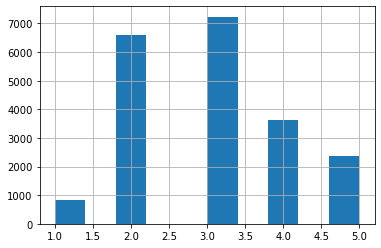

In [16]:
v["ingresos_cat"].hist()
plt.show() 

Ahora está listo para hacer un muestreo estratificado basado en la categoría de ingresos.

Para esto, puede usar la clase `StratifiedShuffleSplit` de Scikit-Learn:

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit


In [7]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [8]:
for train_index, test_index in sss.split(v, v["ingresos_cat"]):
    strat_train_set = v.loc[train_index]
    strat_test_set = v.loc[test_index]

Veamos si esto funcionó como se esperaba. 

Puede comenzar observando las proporciones de las categorías de ingresos en el conjunto de prueba:

In [9]:
 strat_test_set["ingresos_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: ingresos_cat, dtype: float64

In [10]:
strat_train_set["ingresos_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: ingresos_cat, dtype: float64

In [11]:
v["ingresos_cat"].value_counts() / len(v)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: ingresos_cat, dtype: float64

Con un código similar, puede medir las proporciones de la categoría de ingresos en el conjunto de datos completo.

La Figura 2-10 compara las proporciones de las categorías de ingresos en el conjunto de datos general, en el conjunto de prueba generado con muestreo estratificado y en un conjunto de prueba generado con muestreo puramente aleatorio.

Como puede ver, el conjunto de prueba generado mediante muestreo estratificado tiene proporciones de categorías de ingresos casi idénticas a las del conjunto de datos completo, mientras que el conjunto de prueba generado mediante muestreo puramente aleatorio está sesgado.

<img src = 'https://github.com/marco-canas/machine_learning/blob/main/classes/class_march_29_muestreo_estratificado/figura_2_10.jpg?raw=true'>

Now you should remove the income_cat attribute so the data is back to its original state:


## Referencias  

* La clase StratifiedShuffleSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html